<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/decision_trees/classification/01_decision_tree_iris_02_Gini_vs_Entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Etap3. Odcinek1: Załadowanie danych**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
sns.set()  # ustawiam seaborn jako domyślną
 
# mój import ze stackoverflow na windows 10
# import PIL
 
print("\n####################################################################")
print("Etap3. Odcinek1: Załadowanie danych")
 
iris = load_iris()
print("Typ iris:", type(iris))
 
print("\nSłownik iris zawiera poniższe klucze")
print(iris.keys())
 
print("\nPokazuje dane (pięć pierwszych wierszy)")
print(iris.data[:5])
 
print("\nDane przypisuje do zmiennej data")
data = iris.data
print(type(data))
 
print("\nPokazuje zmienną docelową target, którą są 3 klasy po 50: zer, jedynek i dwójek")
print(iris.target)
 
print("\nPrzypisuje klasy do zmiennej targets")
targets = iris.target
print(type(targets))
 
print("\nPokazuje nazwy zmiennych, czyli feature_names")
print(iris.feature_names)
 
print("\nNazwy zmiennych przypisuje do zmiennej feature_names.")
print("Zamiast spacji zamieniam na podkreślenie _ (tak na github)")
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
# feature_names = iris.feature_names
 
print("\nNazwy zmiennych po sformatowaniu i przypisaniu do zmiennej")
print(feature_names)
 
print("\nPokazuje nazwy kosaćca, czyli target_names")
print(iris.target_names)
 
print("\nPrzypisuje nazwy kosaćca do zmiennej class_names")
class_names = iris.target_names
 
print("\nLiczba próbek:", len(data))
print("\nKształt danych (ilość próbek, ilość zmiennych objaśniających feature_names):", data.shape)
print('Nazwy zmiennych objaśniających (atrybutów):', feature_names)
print('Nazwy kategorii kosaćca:', class_names)


####################################################################
Etap3. Odcinek1: Załadowanie danych
Typ iris: <class 'sklearn.utils.Bunch'>

Słownik iris zawiera poniższe klucze
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Pokazuje dane (pięć pierwszych wierszy)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Dane przypisuje do zmiennej data
<class 'numpy.ndarray'>

Pokazuje zmienną docelową target, którą są 3 klasy po 50: zer, jedynek i dwójek
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Przypisuje klasy do zmiennej targets
<class 'numpy.ndarray'>

Pokazuje nazwy zmiennych, czyli feature_names
['sepal length (cm)', 'sepal width (cm)',

# **Etap3. Odcinek2: Eksploracja danych cz.1**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek2: Eksploracja danych cz.1")
 
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=300)
# PIL.Image.open("Iris_setosa.jpg").show()  # tak uruchamiam na windows 10


####################################################################
Etap3. Odcinek2: Eksploracja danych cz.1


In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=300)
# PIL.Image.open("Iris_versicolor.jpg").show()  # tak uruchamiam na windows 10

In [ ]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=300)
# PIL.Image.open("Iris_virginica.jpg").show()  # tak uruchamiam na windows 10

Poznaj swoje dane

In [ ]:
print("\nOpis iris. Kolumna Class Correlation to współczynniki koleracji ze zmienną Class.")
print("Skoro zmienne petal length i petal width mają (high) to je weźmiemy do modelu")
print(iris.DESCR)


Opis iris. Kolumna Class Correlation to współczynniki koleracji ze zmienną Class.
Skoro zmienne petal length i petal width mają (high) to je weźmiemy do modelu
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:

In [ ]:
print("\nPołączę dane (4 zmienne) z klasami (targetem) i mam nową tablicę numpy")
print("o wymiarze 150 na 5. Przypisuję ją do zmiennej data_targets czyli dane i targety")
data_targets = np.c_[data, targets]  # funkcja c_[] to w skrócie concatenate
print(data_targets[:8])
print("\nZamieniam tablicę data_targets z numpy na DataFrame, bo pandas ma więcej funkcji do analizy.")
print("Natomiast numpy jest lepsza w obliczeniach niż pandas")
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
# print(df.head())
print(df.head(8))

print("\nWyświetla kolumnę sepal_length. Mogę po kropce bo nie ma spacji")
print(df.sepal_length)
# print(df["sepal_length"])  # to dłuższa wersja


Połączę dane (4 zmienne) z klasami (targetem) i mam nową tablicę numpy
o wymiarze 150 na 5. Przypisuję ją do zmiennej data_targets czyli dane i targety
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]]

Zamieniam tablicę data_targets z numpy na DataFrame, bo pandas ma więcej funkcji do analizy.
Natomiast numpy jest lepsza w obliczeniach niż pandas
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2    0.0
1           4.9          3.0           1.4          0.2    0.0
2           4.7          3.2           1.3          0.2    0.0
3           4.6          3.1           1.5          0.2    0.0
4           5.0          3.6           1.4          0.2    0.0
5           5.4          3.9           1.7          0.4    0.0
6           4.6          3.4           1.4          0.3    0.0
7         

# **Etap3. Odcinek3: Eksploracja danych cz.2**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek3: Eksploracja danych cz.2")

print("\nWyświetla informacje o danych")
print(df.info())


####################################################################
Etap3. Odcinek3: Eksploracja danych cz.2

Wyświetla informacje o danych
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None


In [ ]:
print("\nWyświetlam podstawowe statystyki i zaokrąglam do 2 miejsc (domyślnie do 6)")
print(df.describe().apply(lambda x: round(x, 2)))


Wyświetlam podstawowe statystyki i zaokrąglam do 2 miejsc (domyślnie do 6)
       sepal_length  sepal_width  petal_length  petal_width   class
count        150.00       150.00        150.00       150.00  150.00
mean           5.84         3.06          3.76         1.20    1.00
std            0.83         0.44          1.77         0.76    0.82
min            4.30         2.00          1.00         0.10    0.00
25%            5.10         2.80          1.60         0.30    0.00
50%            5.80         3.00          4.35         1.30    1.00
75%            6.40         3.30          5.10         1.80    2.00
max            7.90         4.40          6.90         2.50    2.00



Wykres dla petal (bo dobrze skorelowany z class). Trzeci wymiar to hue='class', czyli kolory.
Na widnows 10 musiałem dorzucić nazwy argumentów
jako x i y, bo był następujący błąd:
From version 0.12, the only valid positional argument will be `data`,
and passing other arguments without an explicit keyword will result in an error or misinterpretation.


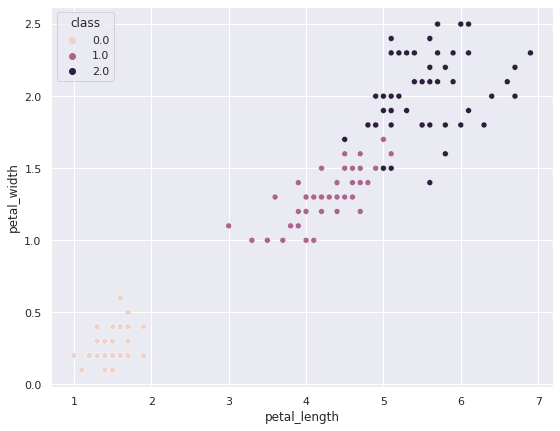

In [ ]:
print("\nWykres dla petal (bo dobrze skorelowany z class). Trzeci wymiar to hue=\'class\', czyli kolory.")
print("Na widnows 10 musiałem dorzucić nazwy argumentów")
print("jako x i y, bo był następujący błąd:")
print("FutureWarning: Pass the following variables as keyword args: x, y.\n"
      "From version 0.12, the only valid positional argument will be `data`,\n"
      "and passing other arguments without an explicit keyword will result in an error or misinterpretation.""")
plt.figure(figsize=(9, 7))
sns.scatterplot(x='petal_length', y='petal_width', hue='class', data=df, legend='full')
plt.show()

Wykres dla sepal


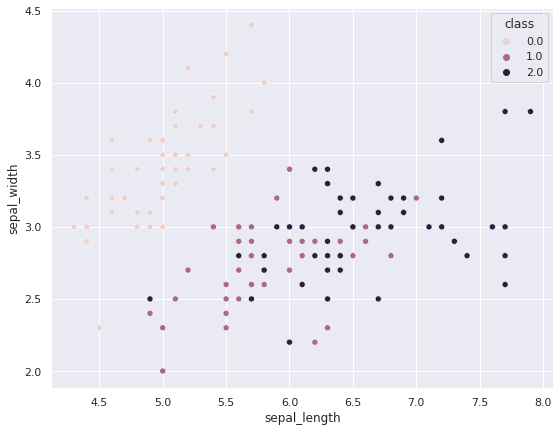

In [ ]:
print("Wykres dla sepal")
plt.figure(figsize=(9, 7))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=df, legend='full')
plt.show()

# **Etap3. Odcinek4: Przygotowanie danych do modelu**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek4: Przygotowanie danych do modelu")

print("\nUpewniam się, że zmienna class jest równo rozłożona. Zliczam ile elementów ma każda klasa")
print(df["class"].value_counts())  # tutaj nie mogę użyć df.class bo to słowo specjalne


####################################################################
Etap3. Odcinek4: Przygotowanie danych do modelu

Upewniam się, że zmienna class jest równo rozłożona. Zliczam ile elementów ma każda klasa
2.0    50
1.0    50
0.0    50
Name: class, dtype: int64


**Przygotowanie danych do modelu**

In [ ]:
print("\nRobi kopię danych, żeby nie zmienić tych oryginalnych")
X = df.copy()
print(X.head())
 
print("\nWycianam tylko kolumny, które nas interesują. Duże X, bo 2-wymiarowa (konwencja)")
# X = df[['petal_length', 'petal_width', 'class']]  # według mnie nie ma sensu tego robić skoro X jest kopią
X = X[['petal_length', 'petal_width', 'class']]  # według mnie
print(X.head())
 
print("\nMałe y, bo 1-wymiarowy wektor (konwencja). Metoda pop() usuwa ostatnią kolumnę, jeśli nie podam argumentu")
y = X.pop('class')
print("Teraz X nie ma ostatniej kolumny, a zarazem y ")
print(X.head())


Robi kopię danych, żeby nie zmienić tych oryginalnych
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2    0.0
1           4.9          3.0           1.4          0.2    0.0
2           4.7          3.2           1.3          0.2    0.0
3           4.6          3.1           1.5          0.2    0.0
4           5.0          3.6           1.4          0.2    0.0

Wycianam tylko kolumny, które nas interesują. Duże X, bo 2-wymiarowa (konwencja)
   petal_length  petal_width  class
0           1.4          0.2    0.0
1           1.4          0.2    0.0
2           1.3          0.2    0.0
3           1.5          0.2    0.0
4           1.4          0.2    0.0

Małe y, bo 1-wymiarowy wektor (konwencja). Metoda pop() usuwa ostatnią kolumnę, jeśli nie podam argumentu
Teraz X nie ma ostatniej kolumny, a zarazem y 
   petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2

In [ ]:
print("\nNatomiast y jest wektorem Series")
print("Typ wektora y", type(y))
print(y)


Natomiast y jest wektorem Series
Typ wektora y <class 'pandas.core.series.Series'>
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: class, Length: 150, dtype: float64


**Konwersja DataFrame do tablicy numpy**

In [ ]:
print("\nKonwersja DataFrame do tablic numpy. Jednocześnie zamieniam klasy na int")
X = X.values
y = y.values.astype('int16')
print("Typ tablicy X", type(X))
print(X[:5])
print()
print("Typ tablicy y", type(y))
print(y[:5])


Konwersja DataFrame do tablic numpy. Jednocześnie zamieniam klasy na int
Typ tablicy X <class 'numpy.ndarray'>
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]

Typ tablicy y <class 'numpy.ndarray'>
[0 0 0 0 0]


# **Etap3. Odcinek5: Budowa modelu drzewa decyzyjnego**

**Budowa klasyfikatora drzewa decyzyjnego**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek5: Budowa modelu drzewa decyzyjnego")

print("\nBiblioteka scikit-learn ma skrót sklearn")

from sklearn.tree import DecisionTreeClassifier

print("Tworzę instancję obiektu tree_clf czyli classifier")
print("Nie muszę gini bo jest domyślnie, ale niech jest (można zmienić na entropy).")
print("Jeśli nie ustawię max_depth to drzewo będzie się uczyło do osiągnięcia pełnej głębokości.")
print("Liczba próbek na liściu min_sample_leaf=1 można podwyższyć żeby uniknąć przeuczenia.")
print("Żeby za każdym razem móc porównać wyniki to random_state=2 bo wtedy dane będą deterministyczne.")
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=2)
print("Przetrenuje model na dostępnych danych. Specjalnie pomijamy podział na dane treningowe i testowe.")
print("Po to żeby samą ideę pokazać (cele edukacyjne), czyli trenuje model na wszystkich dostępnych danych.")
print("Metoda fit() dopasowuje model do danych i on już będzie nauczony")
print(tree_clf.fit(X, y))


####################################################################
Etap3. Odcinek5: Budowa modelu drzewa decyzyjnego

Biblioteka scikit-learn ma skrót sklearn
Tworzę instancję obiektu tree_clf czyli classifier
Nie muszę gini bo jest domyślnie, ale niech jest (można zmienić na entropy).
Jeśli nie ustawię max_depth to drzewo będzie się uczyło do osiągnięcia pełnej głębokości.
Liczba próbek na liściu min_sample_leaf=1 można podwyższyć żeby uniknąć przeuczenia.
Żeby za każdym razem móc porównać wyniki to random_state=2 bo wtedy dane będą deterministyczne.
Przetrenuje model na dostępnych danych. Specjalnie pomijamy podział na dane treningowe i testowe.
Po to żeby samą ideę pokazać (cele edukacyjne), czyli trenuje model na wszystkich dostępnych danych.
Metoda fit() dopasowuje model do danych i on już będzie nauczony
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       m

**Wykreślenie granic decyzyjnych**


Wykreślenie granic decyzyjnych

Przekazuję dane: X na których algorytm się uczy, y to nasze klasy (targety),
clf to instancja naszego modelu czyli utworzona wcześniej tree_clf


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


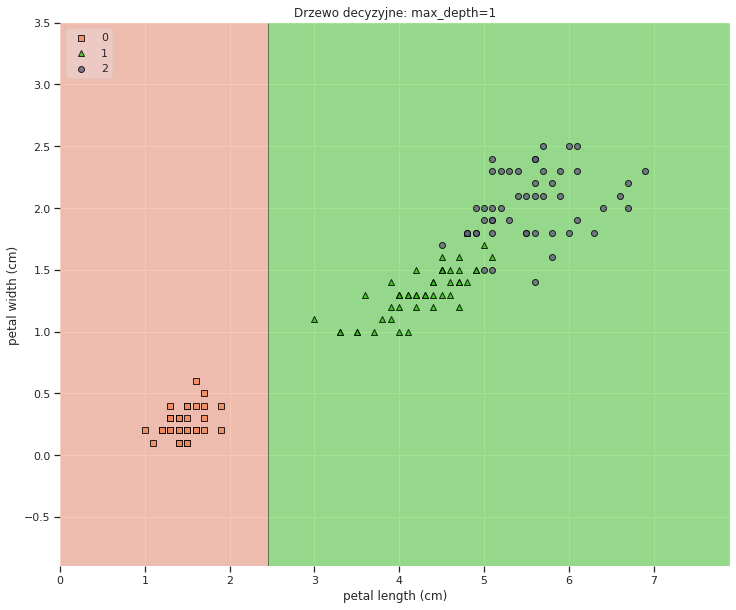

In [ ]:
print("\nWykreślenie granic decyzyjnych")
from mlxtend.plotting import plot_decision_regions

print("\nPrzekazuję dane: X na których algorytm się uczy, y to nasze klasy (targety),")
print("clf to instancja naszego modelu czyli utworzona wcześniej tree_clf")

colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')
plt.show()

In [ ]:
print("\nDokładność modelu: " + str(round(tree_clf.score(X, y), 4) * 100) + '%')


Dokładność modelu: 66.67%



Jeśli zwiększę głębokość na 2, czyli wstawię max_depth=2


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


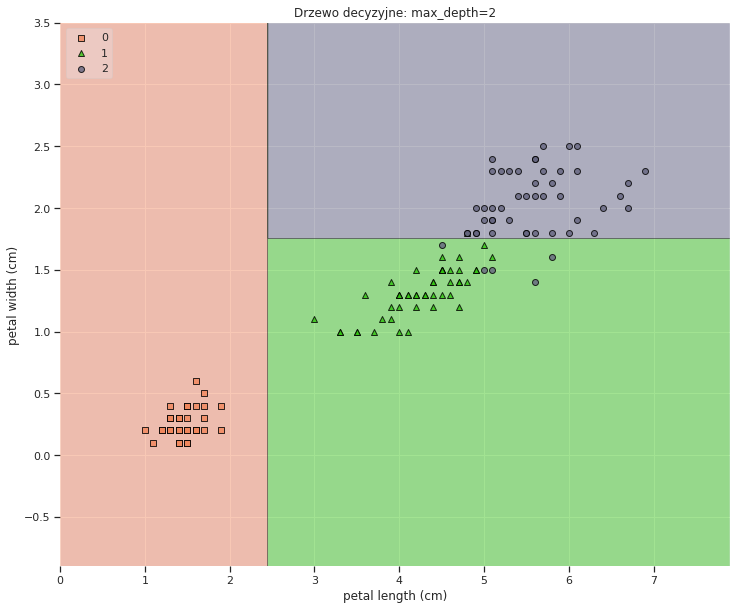

In [ ]:
print("\nJeśli zwiększę głębokość na 2, czyli wstawię max_depth=2")
tree_clf_depth_2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=2)
tree_clf_depth_2.fit(X, y)

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf_depth_2, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=2')
plt.show()

In [ ]:
print("\nDokładność drugiego modelu: " + str(round(tree_clf_depth_2.score(X, y), 4) * 100) + '%')


Dokładność drugiego modelu: 96.0%


# **Etap3. Odcinek6: Graf drzewa decyzyjnego**

**max_depth = 1**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek6: Graf drzewa decyzyjnego")

from sklearn.tree import export_graphviz

print("\nDomyślnie zapisuje do formatu dot. Z feature_names interesują nas dwie ostatnie kolumny")
print("czyli petal_length i petal_width. Parametry rounded i filled upraszczają czytanie grafu")
export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=class_names,
               rounded=True,
               filled=True)


####################################################################
Etap3. Odcinek6: Graf drzewa decyzyjnego

Domyślnie zapisuje do formatu dot. Z feature_names interesują nas dwie ostatnie kolumny
czyli petal_length i petal_width. Parametry rounded i filled upraszczają czytanie grafu


**Przekonwertowanie pliku .dot na plik .png**

In [ ]:
print("\nMożna zamienić rozszerzenie dot na png na dwa sposoby")
print("Pierwszy: mając linuxa")
!%%bash
!dot -Tpng iris_tree.dot -o iris_tree_1.png


Można zamienić rozszerzenie dot na png na dwa sposoby
Pierwszy: mając linuxa
/bin/bash: line 0: fg: no job control



Drugi: bardziej przyjazny dla Python'a sposób


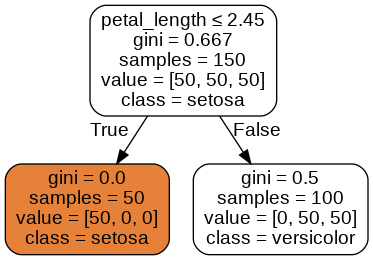

In [ ]:
print("\nDrugi: bardziej przyjazny dla Python'a sposób")

# from sklearn.externals.six import StringIO  # nie ma takiego modułu sklearn.externals.six bo jest w starszej wersji

# instalowałem pakiet six
# !pip install six

# poniższy wiersz powinien działać
from six import StringIO  # na windows 10, tak znalazłem na https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six

# from IPython.display import Image  # u mnie nie wyświetla obrazu korzystając z tej klasy. Używam PIL
# import pydotplus  # ModuleNotFoundError: No module named 'pydotplus'

# instalowałem pakiet pydotplus
# !pip install pydotplus

# poniższy wiersz powinien działać
import pydotplus  # na windows 10 był błąd i musiałem zainstalować GraphViz zgodnie z poradą na

# https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8
# Install GraphViz if you haven't already (I used the MSI download)
# Get the path for gvedit.exe (for me it was "C:\Program Files (x86)\Graphviz2.34\bin\")
# Add this path to the computer's PATH
# One way to get to environment settings to set your path is to click on each of these button/menu options: start->computer->system properties->advanced settings->environment variables
# Click Edit User path
# Add this string to the end of your Variable value list (including semicolon): ;C:\Program Files (x86)\Graphviz2.34\bin
# Click OK
# Restart your Python IDE

# poniższe 11 wierszy powinno działać
dot_data = StringIO()
export_graphviz(tree_clf,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')  # tu tworzy graf
Image(graph.create_png())  # tu wyświetla graf

# PIL.Image.open("graph.png").show()  # tak uruchamiam na windows 10


Zrobiłem sam graf dla głębokości 2


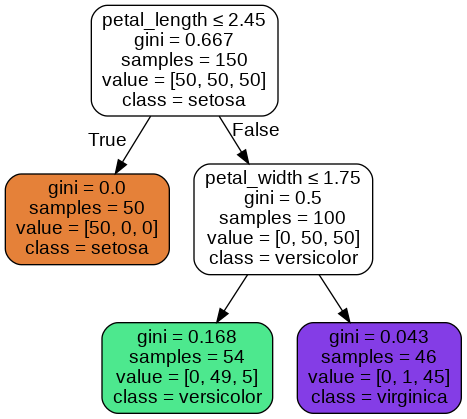

In [ ]:
print("\nZrobiłem sam graf dla głębokości 2")
export_graphviz(tree_clf_depth_2,
               out_file='iris_tree_depth_2.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

dot_data = StringIO()
export_graphviz(tree_clf_depth_2,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph_depth_2.png')  # tu tworzy graf
Image(graph.create_png())  # tu wyświetla graf
# PIL.Image.open("graph_depth_2.png").show()  # windows 10 mój sposób na otwieranie png

In [ ]:
print("\nObliczyłem współczynniki giniego na grafie głębokości 2")
print("Na górze: samples=150, value=[50,50,50]. Wtedy gini=1-(50/150)^2-(50/150)^2-(50/150)^2=0.667")
print("Liść pomarańczowy: samples 50, value=[50,0,0]. Wtedy gini=1-(50/50)^2-(0/50)^2-(0/50)^2=0")
print("Drugi biały: samples=100, value=[0,50,50]. Wtedy gini=1-(0/100)^2-(50/100)^2-(50/100)^2=0.5")
print("Liść zielony: samples 54, value=[0,49,5]. Wtedy gini=1-(0/54)^2-(49/54)^2-(5/54)^2=0.168")
print("Liść fioletowy: samples 46, value=[0,1,45]. Wtedy gini=1-(0/46)^2-(1/46)^2-(45/46)^2=0.043")




Obliczyłem współczynniki giniego na grafie głębokości 2
Na górze: samples=150, value=[50,50,50]. Wtedy gini=1-(50/150)^2-(50/150)^2-(50/150)^2=0.667
Liść pomarańczowy: samples 50, value=[50,0,0]. Wtedy gini=1-(50/50)^2-(0/50)^2-(0/50)^2=0
Drugi biały: samples=100, value=[0,50,50]. Wtedy gini=1-(0/100)^2-(50/100)^2-(50/100)^2=0.5
Liść zielony: samples 54, value=[0,49,5]. Wtedy gini=1-(0/54)^2-(49/54)^2-(5/54)^2=0.168
Liść fioletowy: samples 46, value=[0,1,45]. Wtedy gini=1-(0/46)^2-(1/46)^2-(45/46)^2=0.043


# **Etap3. Odcinek7: Automatyzacja budowy modelu drzew decyzyjnych**

**Budowa prostej funkcji dla modelu drzewa decyzyjnego**

In [ ]:
print("\n####################################################################")
print("Etap3. Odcinek7: Automatyzacja budowy modelu drzew decyzyjnych")

def make_decision_tree(max_depth=1):
    # train model (instancja modelu i przetrenowanie go)
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    tree_clf.fit(X, y)

    # export graph
    dot_data = StringIO()
    export_graphviz(tree_clf,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    # zmieniłem na poniższy żeby nie nadpisywał tego samego pliku
    # graph.write_png('graph.png')  
    # sam wymyśliłem oddzielne nazwy plików _{}
    graph.write_png('graph_max_depth_{}.png'.format(max_depth))  

    # plot decision boundries
    # Wykres granic decyzyjnych to te regiony decyzyjne ("prostokąty") na płaszczyźnie
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(12, 10))
    ax = plot_decision_regions(X, y, tree_clf, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title('Drzewo decyzyjne: max_depth={}'.format(max_depth))

    # accuracy
    print('Dokładność modelu: ' + str(round(tree_clf.score(X, y) * 100, 2)) + '%')
    return Image(graph.create_png())  # zwraca rysunek grafu


####################################################################
Etap3. Odcinek7: Automatyzacja budowy modelu drzew decyzyjnych


Dokładność modelu: 66.67%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


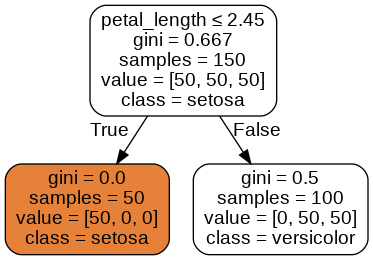

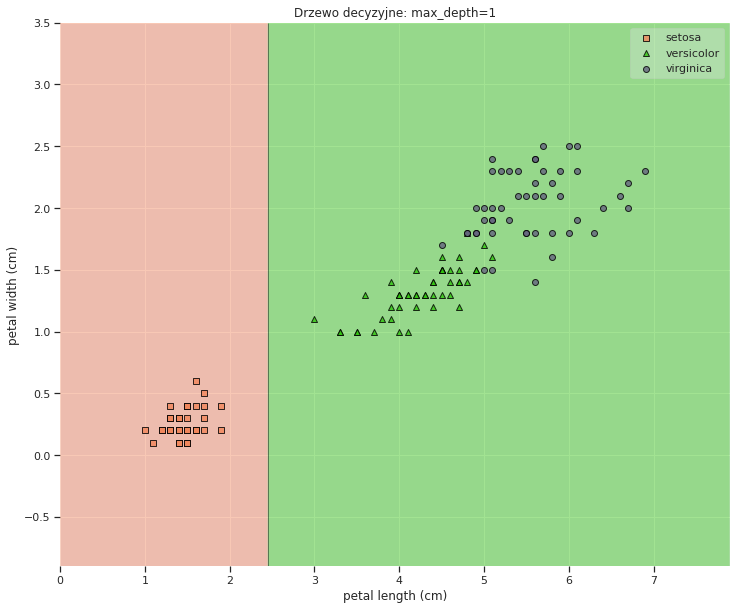

In [ ]:
make_decision_tree()  # wywołuję dla głębokości 1

Dokładność modelu: 96.0%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


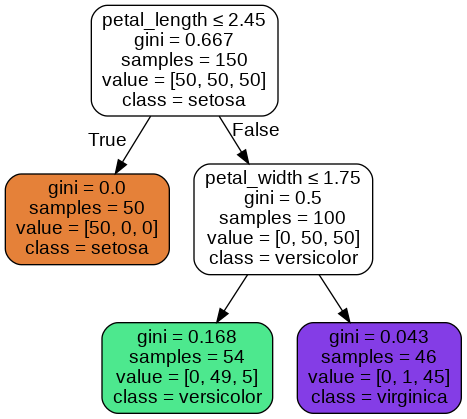

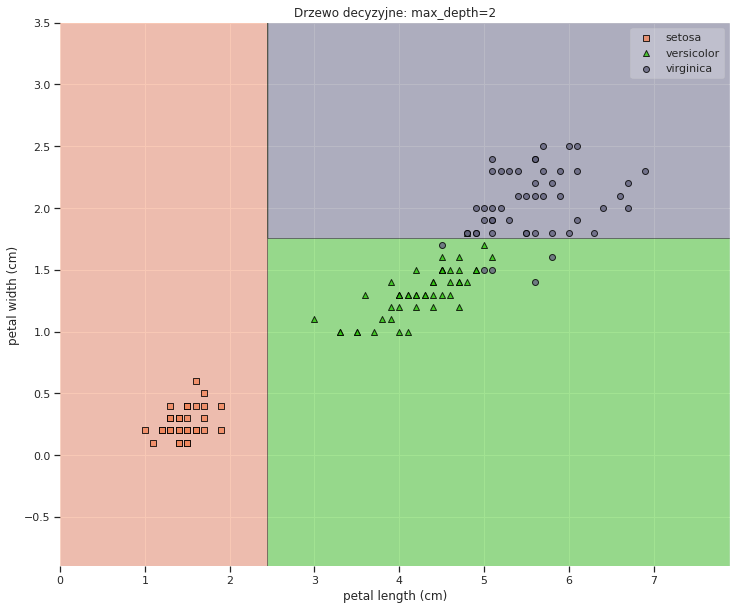

In [ ]:
make_decision_tree(max_depth=2)

Dokładność modelu: 97.33%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


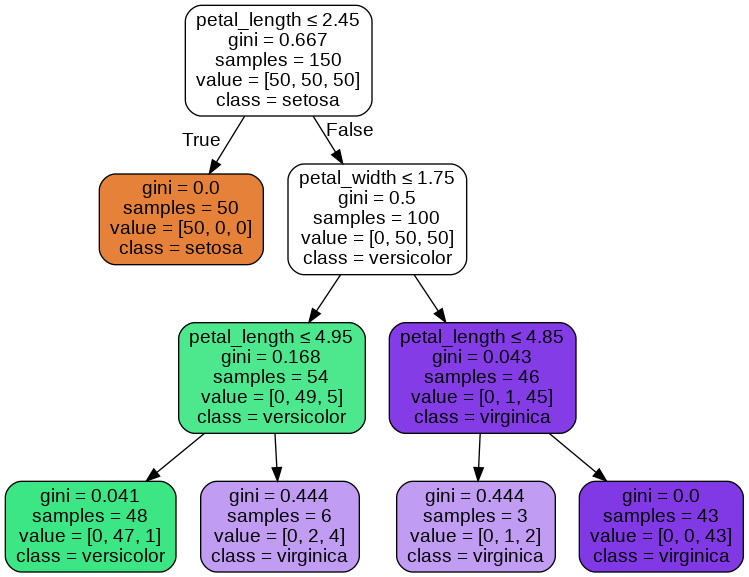

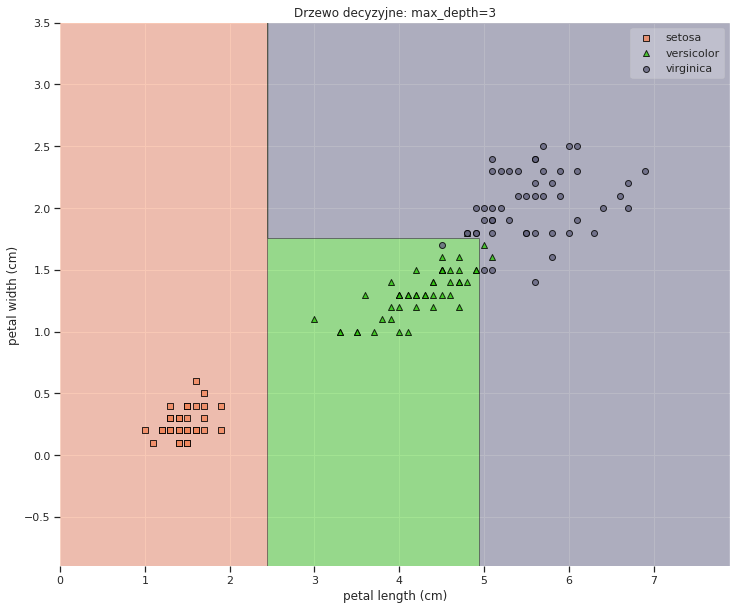

In [ ]:
make_decision_tree(max_depth=3)

Dokładność modelu: 98.67%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


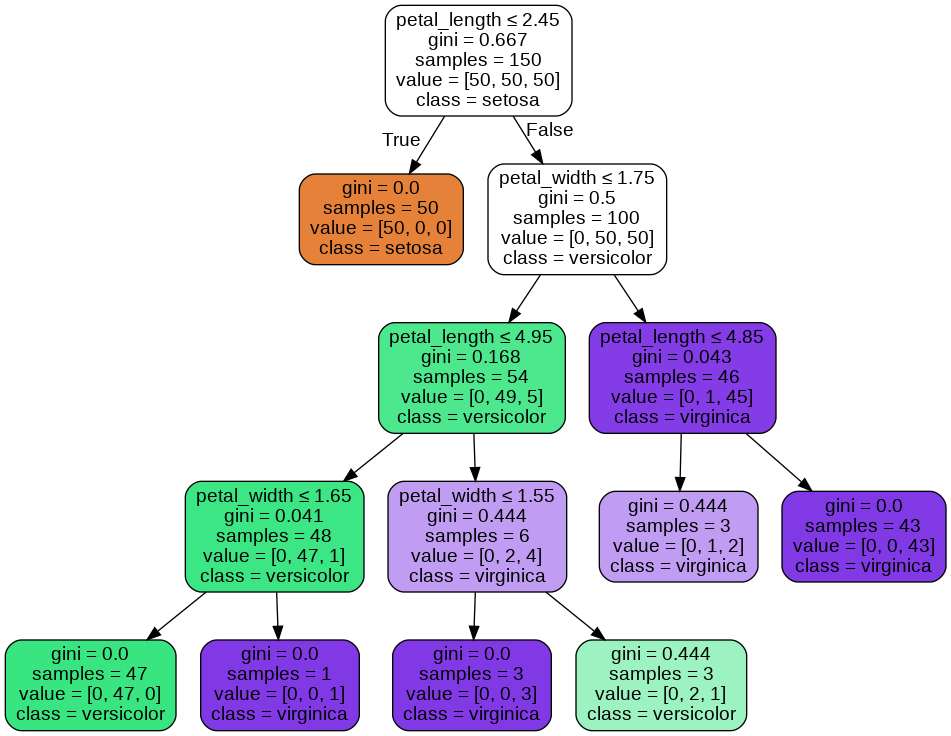

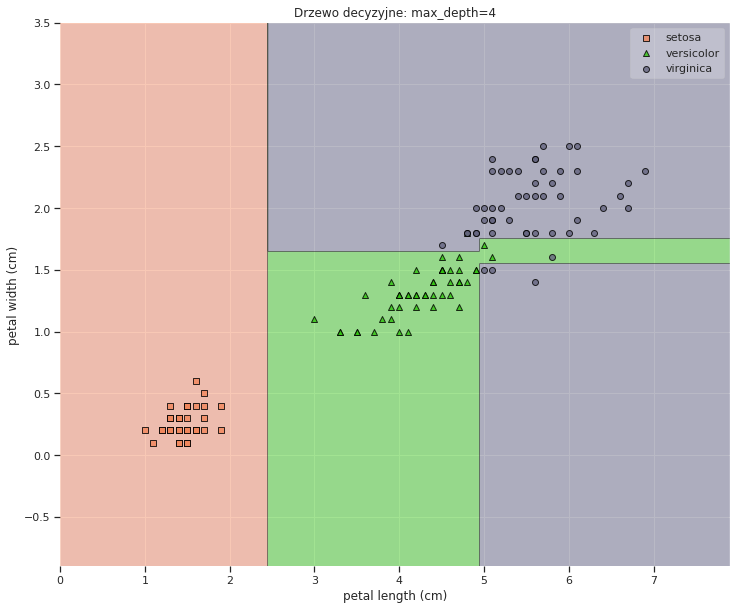

In [ ]:
make_decision_tree(max_depth=4)

Dokładność modelu: 99.33%


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


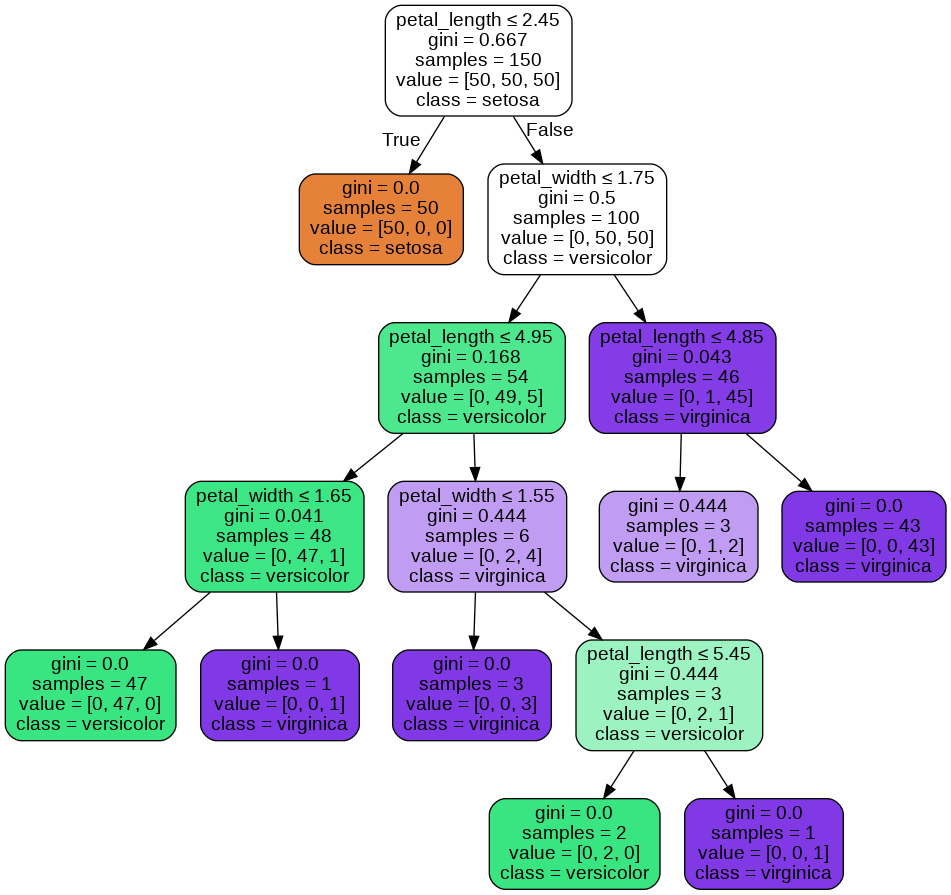

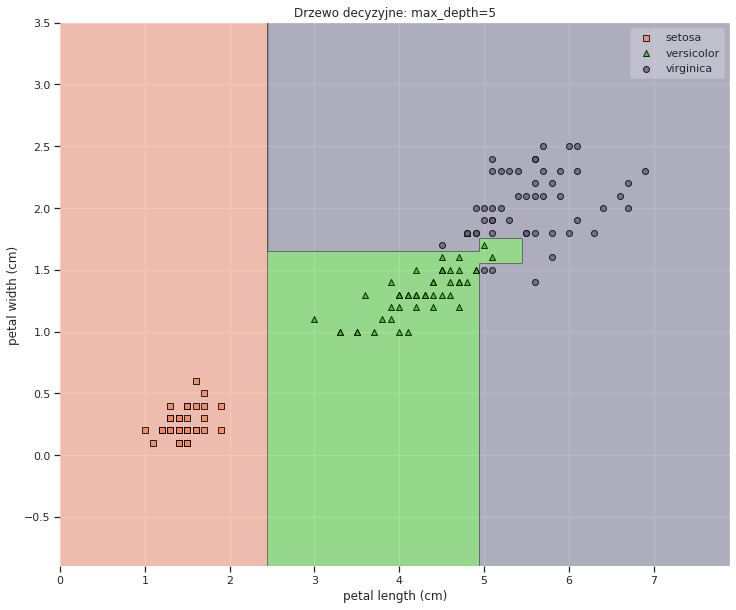

In [ ]:
make_decision_tree(max_depth=5)

# **Etap4. Odcinek1: Drzewa decyzyjne - elementy składowe**

**Budowa klasyfikatora drzewa decyzyjnego - kryterium Gini**


####################################################################
Etap4. Odcinek1: Drzewa decyzyjne - elementy składowe

Jeszcze raz wywołuję graf dla maksymalnej głębokości 2


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Dokładność modelu: 96.0%

Wskaźnik Giniego. To 1 minus suma kwadratów udziałów poszczególnych klaw w danym węźle


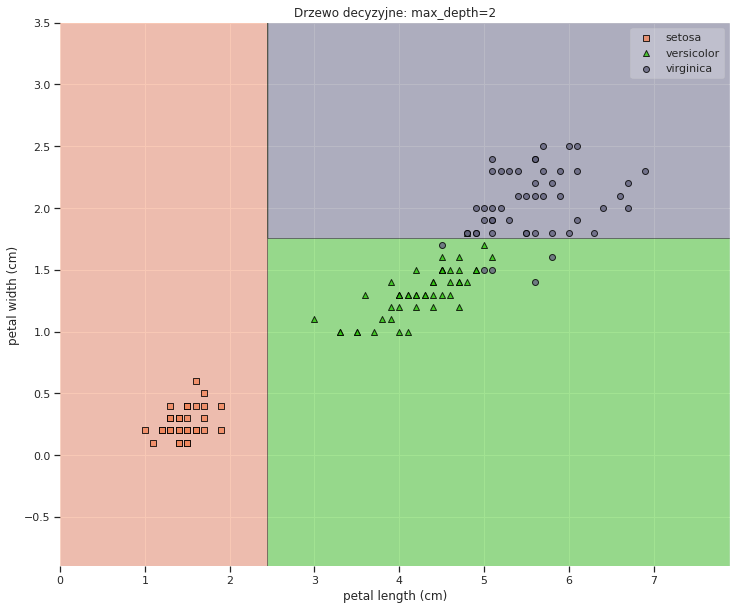

In [ ]:
print("\n####################################################################")
print("Etap4. Odcinek1: Drzewa decyzyjne - elementy składowe")

print("\nJeszcze raz wywołuję graf dla maksymalnej głębokości 2")
make_decision_tree(max_depth=2)

print("\nWskaźnik Giniego. To 1 minus suma kwadratów udziałów poszczególnych klaw w danym węźle")



Wskaźnik Giniego
Miara zanieczyszczenia

węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0
$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$
$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

**Gini dla korzenia (root) - poziom 0**

In [ ]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

**Poziom 1, węzeł lewy**

In [ ]:
1 - (0 / 50)**2 - (50 / 100)**2 - (50 / 100)**2

0.5

**Poziom 2, węzeł lewy**

In [ ]:
1 - (49 / 54)**2 - (5 / 54)**2

0.1680384087791495

**Poziom 2, węzeł prawy**

In [ ]:
1 - (1 / 46)**2 - (45 / 46)**2

0.04253308128544431

**Budowa klasyfikatora drzewa decyzyjnego - kryterium Entropia**

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=2')

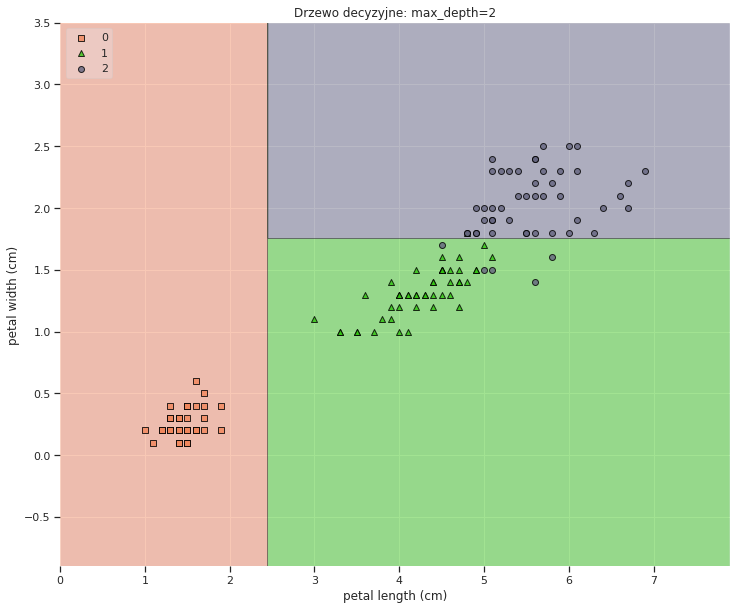

In [ ]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=2')

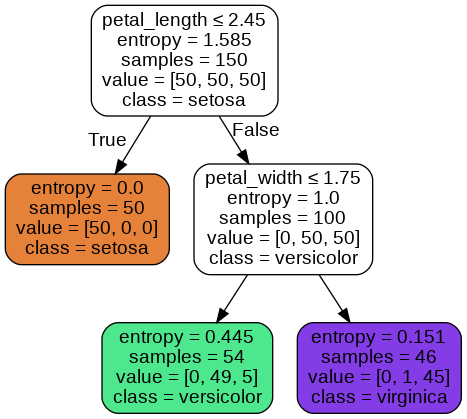

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

**Entropia**

$$Entropia  = -\sum_{k=1, p_{i,k}\ne 0}^{n}p_{i,k} \cdot log_{2}(p_{i,k})$$

**Entropia dla korzenia (root) - poziom 0**

In [ ]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

**Entopia poziom 1 węzeł lewy**

In [ ]:
-((50 / 50) * np.log2(50 / 50))

-0.0

**Entopia poziom 1 węzeł prawy**

In [ ]:
-((50 / 100) * np.log2(50 / 100) + (50 / 100) * np.log2(50 / 100))

1.0